# Maximum Likelihood Estimation

## Probability distribution case

In [1]:
import numpy as np
import matplotlib.pyplot as plt

(1000,)


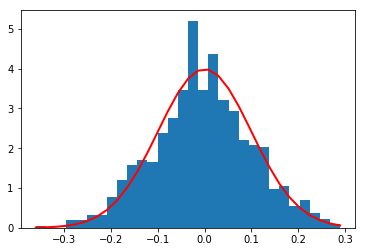

In [2]:
mu, sigma = 0, 0.1 # true mean and standard deviation
data = np.random.normal(mu, sigma, 1000)
print(data.shape)

count, bins, ignored = plt.hist(data, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

In [3]:
from UQpy.Inference import Model
candidate_model = Model(model_type = 'pdf', model_name='normal')

In [4]:
from UQpy.Inference import MLEstimation
ml_estimator = MLEstimation(model=candidate_model, data=data)
print('ML estimates of the mean={0:.3f} and std. dev={1:.3f}'.format(ml_estimator.param[0], ml_estimator.param[1]))

ML estimates of the mean=-0.004 and std. dev=0.105


## Regression model (model linear in the parameters)

In [5]:
# Generate data
from scipy.stats import multivariate_normal

param_true = np.array([1.0, 2.0]).reshape((1, -1))
error_covariance = np.eye(50)

print(param_true.shape)
from UQpy.RunModel import RunModel
z = RunModel(samples=param_true, model_script='pfn_quadratic.py', model_object_name = 'RunPythonModel', 
             var_names = ['theta_1', 'theta_2'])
data = z.qoi_list[0].reshape((-1,))+multivariate_normal.rvs(mean=None, cov=error_covariance, size=1)
print(data)

(1, 2)
[ 6.44512135e-01 -1.83313990e-01  2.46203189e+00  4.61676160e-01
  3.53501093e+00  1.85365629e+00  3.70257207e+00  5.21953854e+00
  7.23911315e+00  9.16275923e+00  1.06021204e+01  1.09166947e+01
  1.40859972e+01  1.44422113e+01  1.83284071e+01  2.15746796e+01
  2.51827780e+01  2.83948864e+01  3.15871575e+01  3.49809277e+01
  3.74713679e+01  4.11432393e+01  4.42351077e+01  4.69834575e+01
  5.26683540e+01  5.67715885e+01  6.25607659e+01  6.62848668e+01
  7.12293118e+01  7.67575605e+01  8.18569748e+01  8.58265890e+01
  9.27517663e+01  9.77839310e+01  1.05645023e+02  1.09511790e+02
  1.15202824e+02  1.22096463e+02  1.28539293e+02  1.35842924e+02
  1.41425909e+02  1.47986196e+02  1.55090685e+02  1.64131059e+02
  1.68570980e+02  1.76769357e+02  1.86202559e+02  1.95712625e+02
  2.02276756e+02  2.11406151e+02]


In [6]:
candidate_model = Model(model_type='python', model_script='pfn_quadratic.py', n_params=2, 
                        error_covariance=error_covariance)

In [7]:
ml_estimator = MLEstimation(model=candidate_model, data=data)

(1, 2)
Optimization terminated successfully.
         Current function value: 68.134186
         Iterations: 56
         Function evaluations: 108


In [8]:
print(ml_estimator.param)

[0.94962335 2.01194443]
